In [8]:
%run create_random_baseline.py

Output run file is saved at runs/en_val_baseline_random.csv


In [9]:
%run evaluation --ground-truth-path data_round_1/sentences_en_val.csv --runfile-path runs/en_val_baseline_random.csv

Macro-averaged F1 score for is_relevant variable is: 49.76
Accuracy for sector_ids variable is: 44.57
HumImpact Score is: 47.17
{'relevance_f1_score_macro': 0.49764958343808857, 'sectorids_accuracy': 0.44566666666666743, 'HumImpact': 0.47165812505237803}


# 1 Imports and Load Files

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os
from ast import literal_eval
import itertools
from urllib.parse import urlparse


In [17]:
data_location = "data_round_1"
train_documents = pd.read_csv(os.path.join(data_location,"documents_en_train.csv"), index_col="doc_id")
validation_documents = pd.read_csv(os.path.join(data_location,"documents_en_val.csv"), index_col="doc_id")
test_documents = pd.read_csv(os.path.join(data_location,"documents_en_test.csv"), index_col="doc_id")
        

train_sentences = pd.read_csv(os.path.join(data_location,"sentences_en_train.csv"), converters={'sector_ids': literal_eval}, index_col=["doc_id","sentence_id"])
validation_sentences = pd.read_csv(os.path.join(data_location,"sentences_en_val.csv"), converters={'sector_ids': literal_eval}, index_col=["doc_id","sentence_id"])
test_sentences = pd.read_csv(os.path.join(data_location,"sentences_en_test.csv"), converters={'sector_ids': literal_eval}, index_col=["doc_id","sentence_id"])

display(HTML(train_documents.head(2).to_html()))
display(HTML(train_sentences.head(2).to_html()))

,project_name,country_code,lang_code,doc_text,doc_url
doc_id,,,,,
48582,IMMAP/DFS Syria,SYR,en,"This website uses cookies to improve your experience. We'll assume you're ok with this, but you can opt-out if you wish.Accept",https://www.syriahr.com/en/203844/
41032,IMMAP/DFS Syria,SYR,en,Please enable Cookies and reload the page.\n\nThis process is automatic. Your browser will redirect to your requested content shortly.\n\nPlease allow up to 5 seconds…,https://www.syriahr.com/en/187230/


# 2 Document Statistics

Length (chars) of a document (train): Mean: 16438.691326530614, Min: 26, Max: 1181981
Length (chars) of a document (validation): Mean: 19951.268221574344, Min: 126, Max: 962293
Length (chars) of a document (test): Mean: 23002.349854227406, Min: 14, Max: 2011127


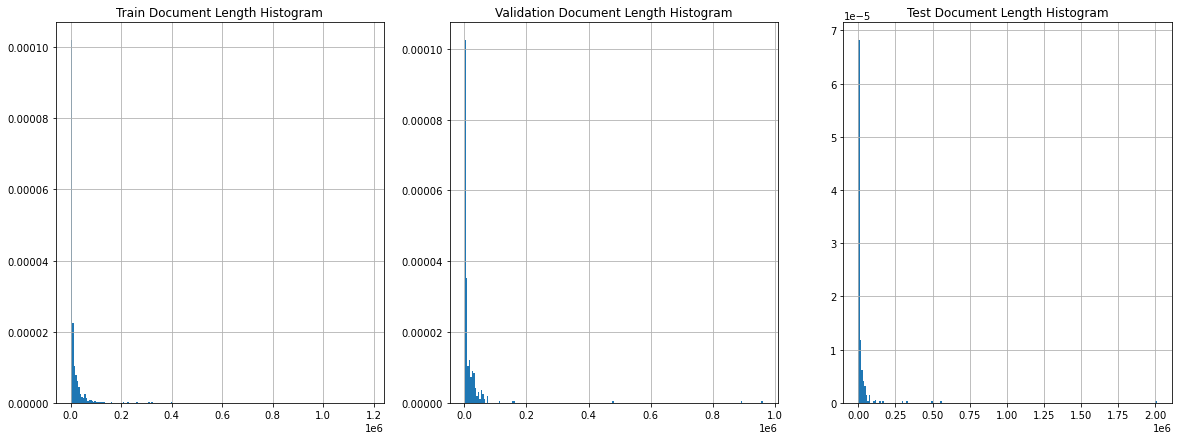

In [57]:
train_document_length = train_documents.doc_text.apply(len)
validation_document_length = validation_documents.doc_text.apply(len)
test_document_length = test_documents.doc_text.apply(len)


print(f"Length (chars) of a document (train): Mean: {train_document_length.mean()}, Min: {train_document_length.min()}, Max: {train_document_length.max()}")
print(f"Length (chars) of a document (validation): Mean: {validation_document_length.mean()}, Min: {validation_document_length.min()}, Max: {validation_document_length.max()}")
print(f"Length (chars) of a document (test): Mean: {test_document_length.mean()}, Min: {test_document_length.min()}, Max: {test_document_length.max()}")

fig, axs = plt.subplots(ncols=3, figsize=(20,7))
train_document_length.hist(bins=200, density=True, ax = axs[0])
axs[0].set_title("Train Document Length Histogram")
validation_document_length.hist(bins=200, density=True, ax = axs[1])
axs[1].set_title("Validation Document Length Histogram")
test_document_length.hist(bins=200, density=True, ax = axs[2])
axs[2].set_title("Test Document Length Histogram")
plt.show()

## Observations

- The document lenghts distributions are not equal but not too far away, all three datasets follow roughly an exponential distribution

# 3 Sentence Statistics

Length (chars) of a sentences (train): Mean: 167.48889423278789, Min: 1, Max: 46479
Length (chars) of a sentences (validation): Mean: 180.66339701959095, Min: 1, Max: 15397
Length (chars) of a sentences (test): Mean: 134.71945174548856, Min: 1, Max: 47150


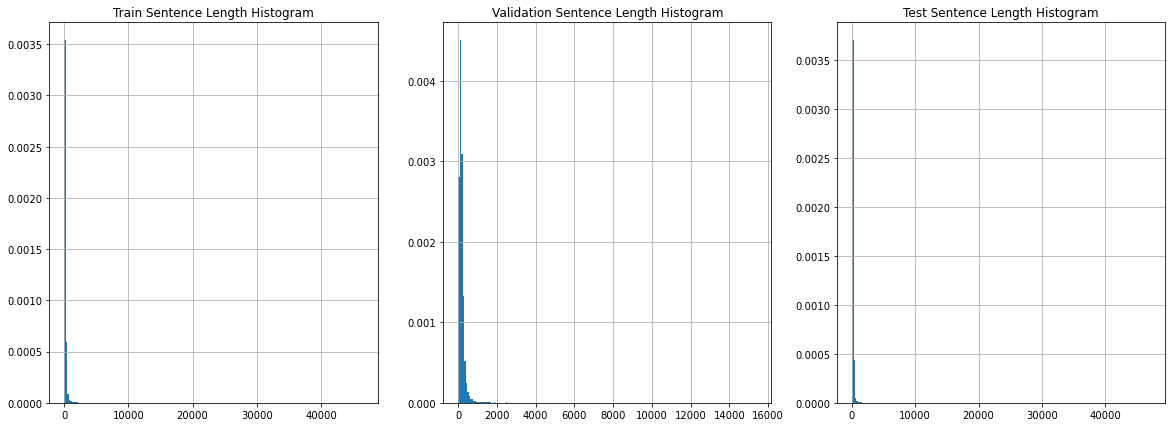

In [18]:
train_sentences_length = train_sentences.sentence_text.apply(len)
validation_sentences_length = validation_sentences.sentence_text.apply(len)
test_sentences_length = test_sentences.sentence_text.apply(len)


print(f"Length (chars) of a sentences (train): Mean: {train_sentences_length.mean()}, Min: {train_sentences_length.min()}, Max: {train_sentences_length.max()}")
print(f"Length (chars) of a sentences (validation): Mean: {validation_sentences_length.mean()}, Min: {validation_sentences_length.min()}, Max: {validation_sentences_length.max()}")
print(f"Length (chars) of a sentences (test): Mean: {test_sentences_length.mean()}, Min: {test_sentences_length.min()}, Max: {test_sentences_length.max()}")

fig, axs = plt.subplots(ncols=3, figsize=(20,7))
train_sentences_length.hist(bins=200, density=True, ax = axs[0])
axs[0].set_title("Train Sentence Length Histogram")
validation_sentences_length.hist(bins=200, density=True, ax = axs[1])
axs[1].set_title("Validation Sentence Length Histogram")
test_sentences_length.hist(bins=200, density=True, ax = axs[2])
axs[2].set_title("Test Sentence Length Histogram")
plt.show()

Number of sentences (train): 261981, Thereof relevant (%): 0.190357405741392, Of relevant has (>=1) section id: 0.7097983052870271
Number of sentences (validation): 37109, Thereof relevant (%): 0.1530980050960164, Of relevant has (>=1) section id: 0.7012380759082606
Number of sentences (test): 56689, (no label data)

Mean lenght of sector_ids (train): 0.24148697806329467
Mean lenght of sector_ids (validation): 0.129375623164192


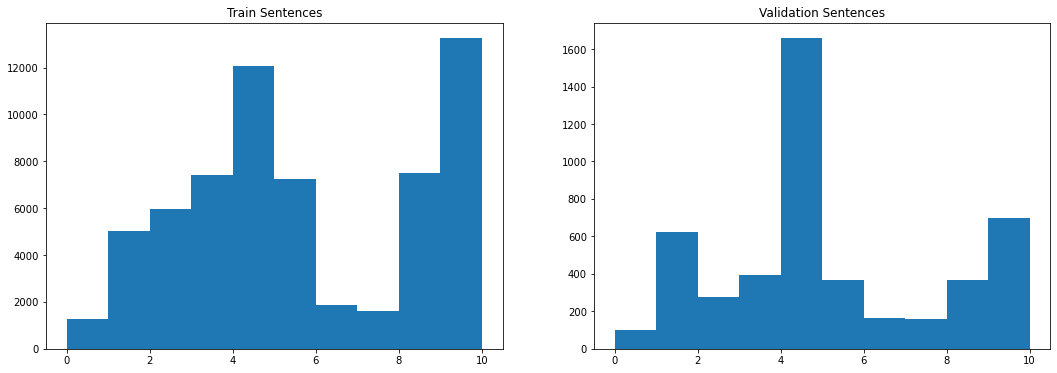

In [50]:
print(f"Number of sentences (train): {len(train_sentences)},\
 Thereof relevant (%): {train_sentences.is_relevant.sum()/(len(train_sentences)-train_sentences.is_relevant.sum())},\
 Of relevant has (>=1) section id: {train_sentences.sector_ids[train_sentences.sector_ids.apply(len) > 0].count() / train_sentences.is_relevant.sum()}")

print(f"Number of sentences (validation): {len(validation_sentences)},\
 Thereof relevant (%): {validation_sentences.is_relevant.sum()/(len(validation_sentences)-validation_sentences.is_relevant.sum())},\
 Of relevant has (>=1) section id: {validation_sentences.sector_ids[validation_sentences.sector_ids.apply(len) > 0].count() / validation_sentences.is_relevant.sum()}")

print(f"Number of sentences (test): {len(test_sentences)},\
 (no label data)")
print()
print(f"Mean lenght of sector_ids (train): {train_sentences.sector_ids.apply(len).mean()}")
print(f"Mean lenght of sector_ids (validation): {validation_sentences.sector_ids.apply(len).mean()}")
fig, axs = plt.subplots(ncols=2,figsize=(18,6))
axs[0].hist(list(itertools.chain.from_iterable(train_sentences.sector_ids.to_list())))
axs[0].set_title("Train Sentences")
axs[1].hist(list(itertools.chain.from_iterable(validation_sentences.sector_ids.to_list())))
axs[1].set_title("Validation Sentences")
plt.show()

## Observations

- The sentence length distribution is not equal but also not too far away, all three datasets follow roughly an exponential distribution.
- The Relevance distribution betwenn the train set and the validation set is similar.
- The Validation set has a different distribution in sentence section ids than the training set.

# 4 Other Statistics

{'NGA', 'BGD', 'COL', 'BFA', 'COD', 'SYR'}
{'IMMAP/DFS Syria', 'IMMAP/DFS Colombia', 'IMMAP/DFS RDC', 'IMMAP/DFS Bangladesh', 'IMMAP/DFS Nigeria', 'IMMAP/DFS Burkina Faso'}
{'en'}


151

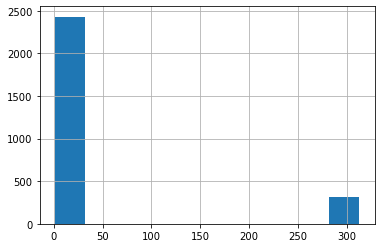

In [125]:
print(set(train_documents["country_code"]))
print(set(train_documents["project_name"]))
print(set(train_documents["lang_code"]))

train_documents.groupby(by='doc_url')["doc_url"].transform('count').hist()

train_documents["doc_url"].fillna("", inplace=True)
len(set(train_documents["doc_url"].apply(lambda x: urlparse(x).netloc)))

{'NGA', 'BGD', 'COL', 'BFA', 'COD', 'SYR'}
{'IMMAP/DFS Syria', 'IMMAP/DFS Colombia', 'IMMAP/DFS RDC', 'IMMAP/DFS Bangladesh', 'IMMAP/DFS Nigeria', 'IMMAP/DFS Burkina Faso'}
{'en'}


46

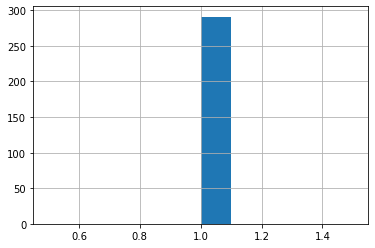

In [127]:
print(set(validation_documents["country_code"]))
print(set(validation_documents["project_name"]))
print(set(validation_documents["lang_code"]))

validation_documents.groupby(by='doc_url')["doc_url"].transform('count').hist()

validation_documents["doc_url"].fillna("", inplace=True)
len(set(validation_documents["doc_url"].apply(lambda x: urlparse(x).netloc)))

{'NGA', 'BGD', 'COL', 'BFA', 'COD', 'SYR'}
{'IMMAP/DFS Syria', 'IMMAP/DFS Colombia', 'IMMAP/DFS RDC', 'IMMAP/DFS Bangladesh', 'IMMAP/DFS Nigeria', 'IMMAP/DFS Burkina Faso'}
{'en'}


46

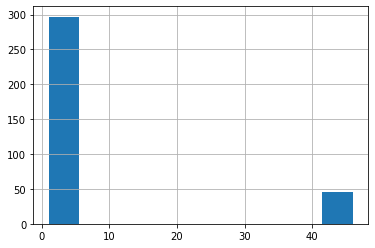

In [128]:
print(set(test_documents["country_code"]))
print(set(test_documents["project_name"]))
print(set(test_documents["lang_code"]))

test_documents.groupby(by='doc_url')["doc_url"].transform('count').hist()

test_documents["doc_url"].fillna("", inplace=True)
len(set(test_documents["doc_url"].apply(lambda x: urlparse(x).netloc)))

## Observations

- It makes sense to ignore the acual content of the features "country_code" and "project" name and just replace them by indices
- Since "en" is the only existing lang code, this feature can be removed alltogether

# 5 Sentence document cleanness relation

75.02405247813411


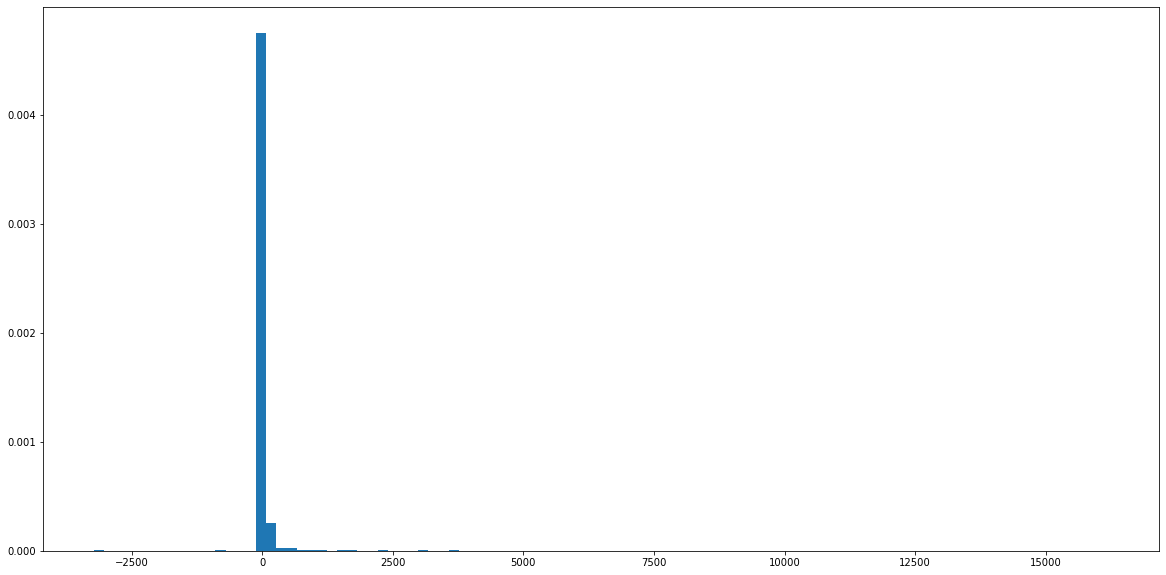

In [35]:
n_sent_diffs = []
for doc in train_documents.iterrows():
    n_sent = len(train_sentences.loc[doc[0], "sentence_text"])
    n_doc_sent = len(doc[1]["doc_text"].split("."))
    n_sent_diffs.append(n_doc_sent - n_sent)

n_sent_diffs = np.array(n_sent_diffs)
print(np.mean(n_sent_diffs))
plt.subplots(figsize=(20,10))
plt.hist(n_sent_diffs, density=True, bins=100)
plt.show()

In [85]:
max_idx = np.argmax(n_sent_diffs)
train_documents.iloc[max_idx]["doc_text"][:5000]

'EASO Democratic Republic of Congo (DRC) \n\n\nMedical Country of Origin Information \n\nReport \n\n\nDecember 2020 [Month] 2020 \n\n\nMore information on the European Union is available on the Internet (http://europa.eu) \n\n\nPDF \n\nISBN: 978-92-9485-769-9 \n\ndoi: 10.2847/40625 \n\nBZ-06-20-137-EN-N \n\n© European Asylum Support Office, 2020 \n\nCover photo©World Bank Photo Collection (CC BY-NC-ND 2.0). A Trip to the Front Lines of the Fight Against Ebola, 16 January 2019 - Beni, Democratic Republic of Congo. \n\nReproduction is authorised provided the source is acknowledged. For any use or reproduction of photos or other material that is not under the EASO copyright, permission must be sought directly from the copyright holders. \n\n\nMedical Country of Origin Information Report | Democratic Republic of Congo (DRC) \n\nAcknowledgements \n\nEASO acknowledges International SOS (Intl.SOS) as the drafter of this report. \n\n\nThe following departments and organisations have reviewed t

In [101]:
train_sentences.loc[train_documents.iloc[max_idx].name].iloc[10]

sentence_text    All sources used are referenced.
is_relevant                                     0
sector_ids                                     []
Name: 10, dtype: object

In [40]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [44]:
tokenizer.decode(tokenizer(train_documents.iloc[max_idx]["doc_text"][:499])["input_ids"])

'[CLS] EASO Democratic Republic of Congo ( DRC ) Medical Country of Origin Information Report December 2020 [ Month ] 2020 More information on the European Union is available on the Internet ( http : / / europa. eu ) PDF ISBN : 978 - 92 - 9485 - 769 - 9 doi : 10. 2847 / 40625 BZ - 06 - 20 - 137 - EN - N © European Asylum Support Office, 2020 Cover photo©World Bank Photo Collection ( CC BY - NC - ND 2. 0 ). A Trip to the Front Lines of the Fight Against Ebola, 16 January 2019 - Beni, Democratic Republic of Congo. Rep [SEP]'

In [52]:
import nltk

In [55]:
nltk.sent_tokenize(train_documents.iloc[max_idx]["doc_text"])[:3]


['EASO Democratic Republic of Congo (DRC) \n\n\nMedical Country of Origin Information \n\nReport \n\n\nDecember 2020 [Month] 2020 \n\n\nMore information on the European Union is available on the Internet (http://europa.eu) \n\n\nPDF \n\nISBN: 978-92-9485-769-9 \n\ndoi: 10.2847/40625 \n\nBZ-06-20-137-EN-N \n\n© European Asylum Support Office, 2020 \n\nCover photo©World Bank Photo Collection (CC BY-NC-ND 2.0).',
 'A Trip to the Front Lines of the Fight Against Ebola, 16 January 2019 - Beni, Democratic Republic of Congo.',
 'Reproduction is authorised provided the source is acknowledged.']

In [78]:
relevant_sents = train_sentences[train_sentences.is_relevant == 1]
lonest_relevant = relevant_sents.iloc[np.argmax(relevant_sents.sentence_text.apply(len))]

In [83]:
tokenizer.decode((tokenizer(lonest_relevant.sentence_text)["input_ids"]))

"[CLS] Physical contact with infected people Physical contact with contaminated object Drinking / washing in infected water Breastmilk Eating certain foods Survey respondents'views on which group of people is most at risk from getting seriously ill from COVID - 19 : 3 Proportion of respondents reporting the following methods of contracting COVID - 19 : 3 21 Symptoms most commonly reported by respondents as related to COVID - 19 : 3 Survey respondents'view on whether one can take measures to reduce the chance of getting COVID - 19 : COVID - 19 Knowledge Round 4 - 25 Aug - 17 Sep 2020 Round 5 - 20 - 26 October 2020 Survey respondents'views on whether all people with COVID - 19 show symptoms : Yes, all show symptoms No, not all show symptoms Do not know Fever Cough Sneezing Sore throat Headache Joint / muscle pain Diarrhoea Vomiting Rash Difficulty breathing Other Drowsiness5 Yes No Do not know 93 % 5 % 54 % 44 % 2 % 92 % 84 % 67 % 54 % 37 % 34 % 24 % 10 % 5 % 3 % 1 % 1 % 54 + 92 + 84 + 6

## Observations

- Document texts are very unclean and do not have 1-1 relation to sentences (i.e. a document_text may contain more things)
- Sentences are sometimes unrealistically long (the longest relevant sentence has about 3800 tokens)
- For classification we will not be able to use a simple BERT but we will need to do some improvisation or use an entirely different technique